In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
df2=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [4]:
# checking null values
print(df1.isnull().sum(),df2.isnull().sum())
print(df1.isna().sum(),df2.isna().sum())

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64 ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScor

In [5]:
#there are two null entries in Recipe_Review column. so filling up them with '-'
df1['Recipe_Review']=df1['Recipe_Review'].fillna('-')
df2['Recipe_Review']=df2['Recipe_Review'].fillna('-')

In [6]:
df1.Recipe_Review.describe()

count          13636
unique         13371
top       Delicious!
freq              12
Name: Recipe_Review, dtype: object

In [7]:
df1.Recipe_Review.value_counts()

Recipe_Review
Delicious!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 12
Excellent!                                                                                                                                                                                                                                                                                                                  

In [8]:
#there is no row with this type of observations
#this shows that unique number is linked with the recipename and also recipecode, so keep only one feature instead.

df1.loc[(df1.RecipeName=='Taco Lasagna') & (df1.RecipeCode!=20170)]

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review


In [9]:
df1['UserName'].nunique()

10620

### similar pattern observed for rating 0 & 5

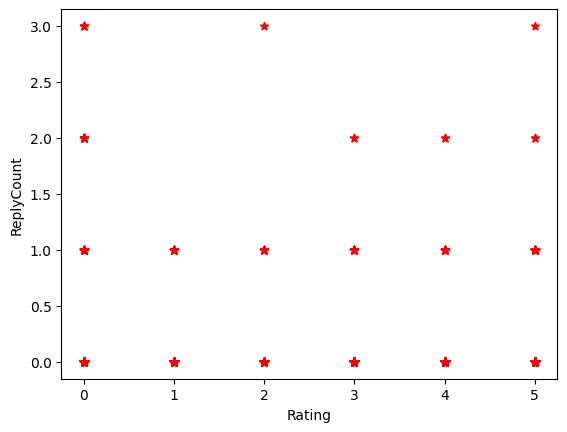

In [10]:
# Relationship betwen ReplyCount and Rating
plt.ylabel('ReplyCount')
plt.xlabel('Rating')
plt.scatter(df1['Rating'],df1['ReplyCount'],color="red",marker='*')

# feature-engineering

In [11]:
df1['Review_Length']= df1['Recipe_Review'].str.split().apply(len)
df2['Review_Length']= df2['Recipe_Review'].str.split().apply(len)

df1['offensive_count']=df1['Recipe_Review'].str.count(r'[#@*^%/+|()=`~!?]')
df2['offensive_count']=df2['Recipe_Review'].str.count(r'[#@*^%/+|()=`~!?]')

# Some data-visualizations

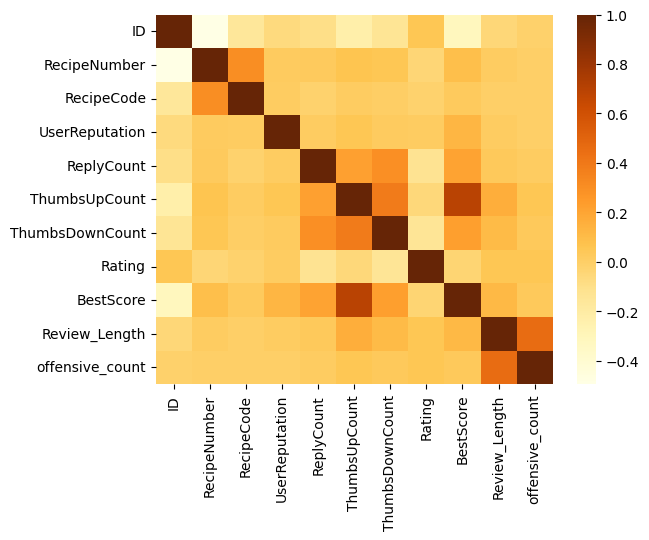

In [12]:
#correlation matrix of numerical features
corr_df1=df1.drop(columns=['RecipeName','CommentID','UserID','UserName','Recipe_Review','CreationTimestamp'])
dataplot = sns.heatmap(corr_df1.corr(),cmap='YlOrBr',annot=False)

<Axes: >

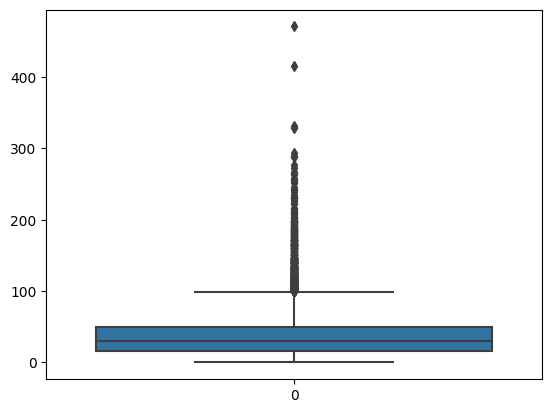

In [13]:
sns.boxplot(df1['Review_Length'])

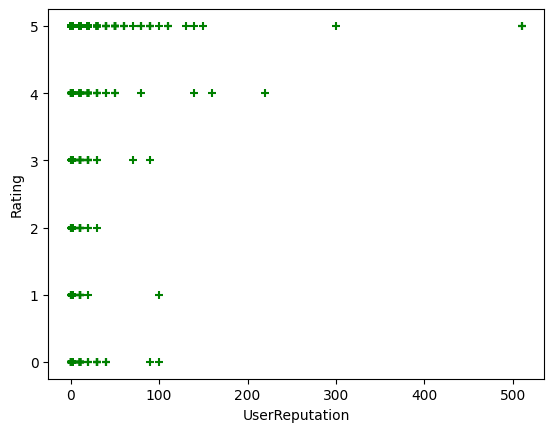

In [14]:
#relationship between username and rating
plt.xlabel('UserReputation')
plt.ylabel('Rating')
plt.scatter(df1['UserReputation'], df1['Rating'],color='green',marker='+')

/tmp/ipykernel_19/1109319784.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


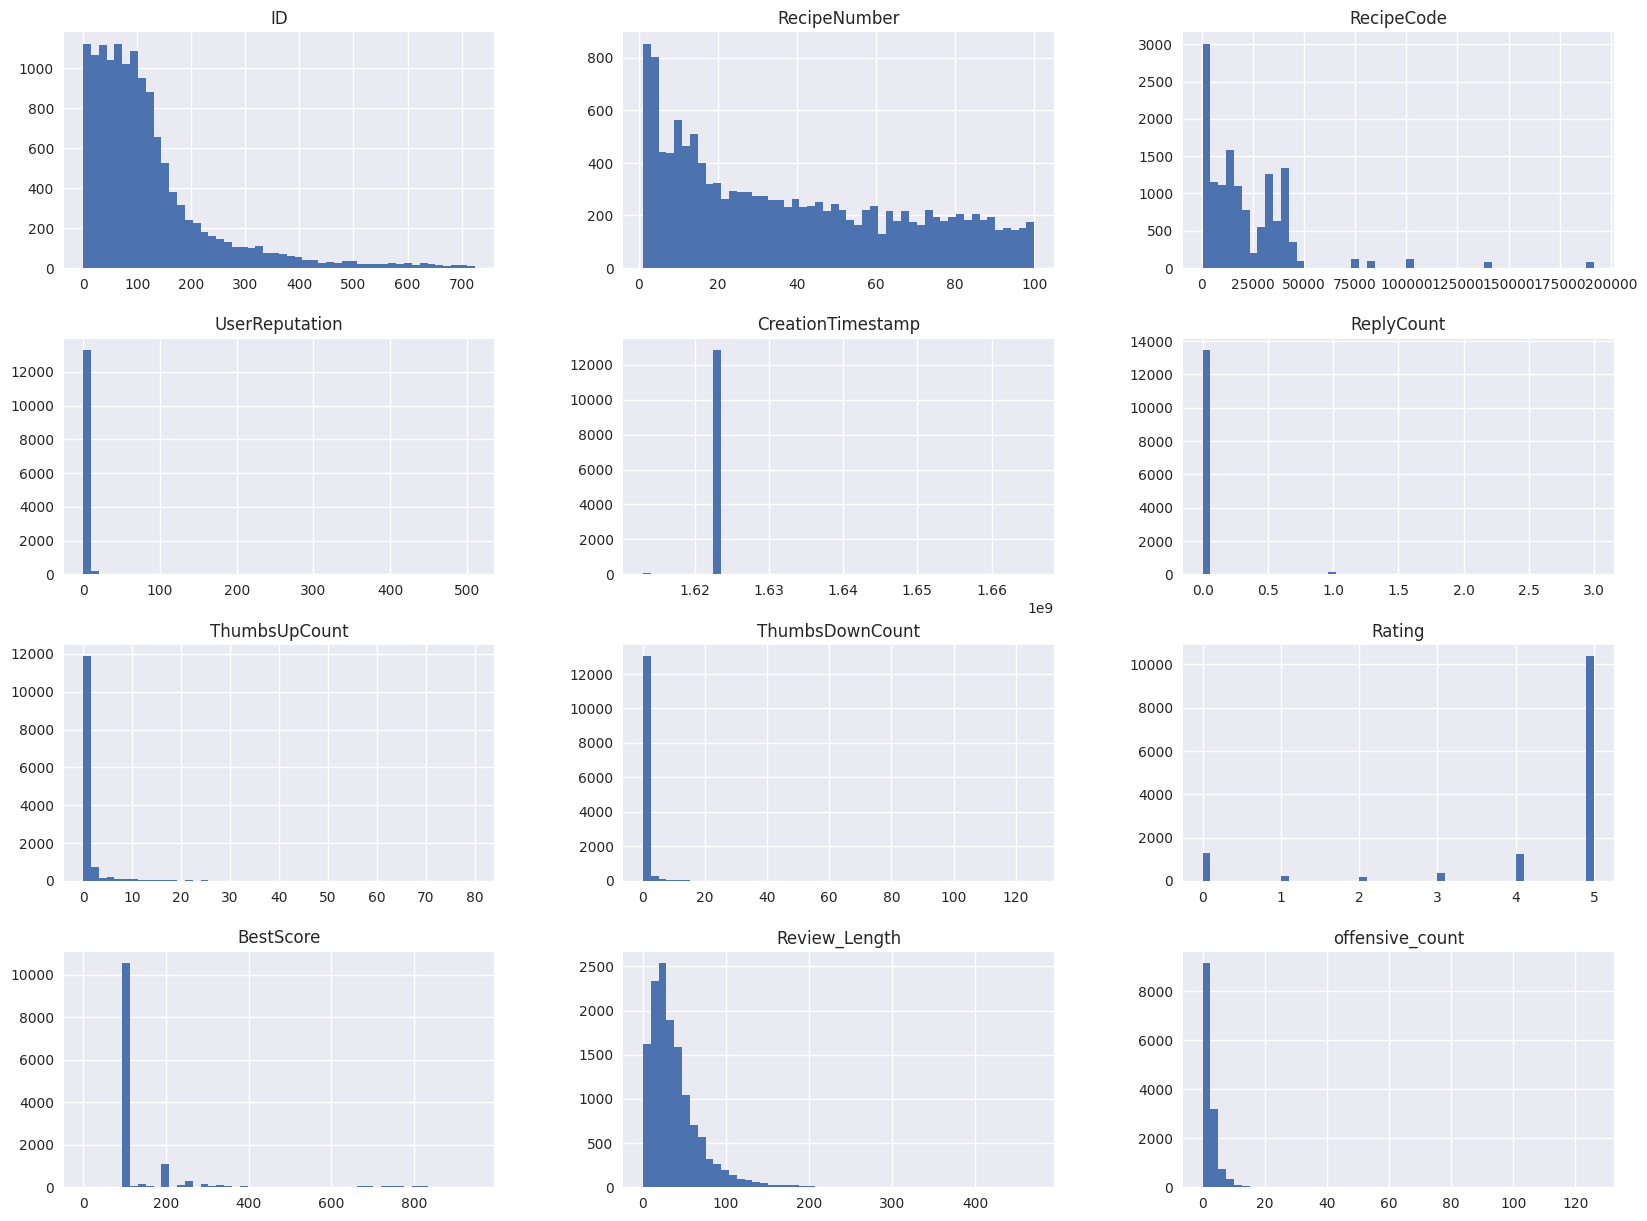

In [15]:
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15))
plt.show()

# prepearing data to fit into a model

In [16]:
y=df1['Rating']
y.value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS
english_stop_words_list = list(ENGLISH_STOP_WORDS)

import re

def custom_tokenizer(text):
    # Remove numbers and punctuation marks
    text = re.sub(r'\d', '', text)  # Remove numbers 
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation marks
    pattern = r'[%$&@#~!`"\'?\\/\[\]{}()<>+=\-_*^|.,:;]'

    # Remove symbols from the text
    text = re.sub(pattern, '', text)
    # Split the text into words based on whitespace
    tokens = text.split()
    
    return tokens


tf=TfidfVectorizer(tokenizer=custom_tokenizer,stop_words=english_stop_words_list, ngram_range=(1, 2),max_features=8000)
tf1=TfidfVectorizer(tokenizer=custom_tokenizer,stop_words=english_stop_words_list,max_features=150)


In [18]:
df1=df1.drop(columns=['ID','RecipeCode','BestScore','UserReputation','CommentID','UserID','UserName','CreationTimestamp','Rating'])
df2=df2.drop(columns=['ID','RecipeCode','BestScore','UserReputation','CommentID','UserID','UserName','CreationTimestamp'])

#removing unnecessary columns which are causing accuracy to drop

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
ms=MinMaxScaler()

In [20]:
#from sklearn.decomposition import TruncatedSVD

'''svd = TruncatedSVD(n_components=60)
svd1=TruncatedSVD(n_components=5)'''

#applynig logistic rgression after applying SVD was not giving good results. So, I kept the dimension as it is.

'svd = TruncatedSVD(n_components=60)\nsvd1=TruncatedSVD(n_components=5)'

In [21]:
'''

from sklearn.preprocessing import normalize

tfidf_matrix =(normalize(tf_Review.toarray()))
tfidf_test_matrix =(normalize(tf_test_Review.toarray()))

RName =(normalize(tf_RName.toarray()))
test_RName =(normalize(tf_test_RName.toarray()))

UName= (normalize(tf_UName.toarray()))
test_UName=(normalize(tf_test_UName.toarray()))

print(tfidf_matrix.shape,RName.shape)'''

'\n\nfrom sklearn.preprocessing import normalize\n\ntfidf_matrix =(normalize(tf_Review.toarray()))\ntfidf_test_matrix =(normalize(tf_test_Review.toarray()))\n\nRName =(normalize(tf_RName.toarray()))\ntest_RName =(normalize(tf_test_RName.toarray()))\n\nUName= (normalize(tf_UName.toarray()))\ntest_UName=(normalize(tf_test_UName.toarray()))\n\nprint(tfidf_matrix.shape,RName.shape)'

In [22]:
'''X=np.hstack([train_X,tfidf_matrix,RName])
X_test=np.hstack([test_X,tfidf_test_matrix,test_RName])'''

'X=np.hstack([train_X,tfidf_matrix,RName])\nX_test=np.hstack([test_X,tfidf_test_matrix,test_RName])'

In [23]:
'''X=ms.fit_transform(X)
X_test=ms.transform(X_test)'''

'X=ms.fit_transform(X)\nX_test=ms.transform(X_test)'

# train_test_split

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.25,random_state=5)

In [25]:
x_train.shape,x_test.shape

((10227, 8), (3409, 8))

In [26]:
# Define the preprocessing steps for different columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Define the ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Review_Length', 'offensive_count','RecipeNumber']),  # Assuming these are the numerical columns
        ('tfidf', tf, 'Recipe_Review'),('tfidf1', tf1, 'RecipeName')  # Assuming this is the text column
    ])

# Define the final pipeline including preprocessing and model fitting
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
x_train = pipeline.fit_transform(x_train)  # Exclude non-feature columns from training data


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [27]:
x_test=pipeline.transform(x_test)

# Model fitting: LogisticRegression

In [28]:
#took 250seconds , score 0.7715
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=3000)

params = {'solver': ['liblinear','newton-cg','sag', 'lbfgs']}

grid_search_log_reg = GridSearchCV(logreg, params, verbose=3,n_jobs=-1, cv=3, scoring='accuracy', return_train_score=True)
grid_search_log_reg.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=3000), n_jobs=-1,
             param_grid={'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [29]:
pd.DataFrame(grid_search_log_reg.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
{'solver': 'sag'},27.482463,0.772856,0.818911,1
{'solver': 'newton-cg'},2.632035,0.772758,0.818471,2
{'solver': 'lbfgs'},2.754702,0.772758,0.818520,2
{'solver': 'liblinear'},1.043008,0.769727,0.793292,4


with liblinear solver this model is working good , and overfits on training data for the other solvers

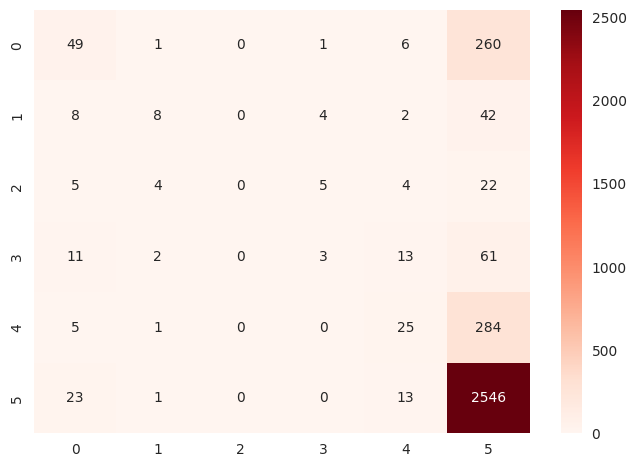

              precision    recall  f1-score   support

           0       0.49      0.15      0.23       317
           1       0.47      0.12      0.20        64
           2       0.00      0.00      0.00        40
           3       0.23      0.03      0.06        90
           4       0.40      0.08      0.13       315
           5       0.79      0.99      0.88      2583

    accuracy                           0.77      3409
   macro avg       0.40      0.23      0.25      3409
weighted avg       0.70      0.77      0.70      3409



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#result of gridseachcv score 0.7717
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,lr.predict(x_test)))

In [31]:
lr.score(x_test,y_test)

0.7717805808154884

#### log-regression base model

In [32]:
'''from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression(max_iter=1000, penalty='l2', C=1, solver='lbfgs')
logi_reg.fit(x_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, logi_reg.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,logi_reg.predict(x_test)))
'''
#scoring 0.767

"from sklearn.linear_model import LogisticRegression\nlogi_reg = LogisticRegression(max_iter=1000, penalty='l2', C=1, solver='lbfgs')\nlogi_reg.fit(x_train, y_train)\n\n\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay\nimport seaborn as sns\nimport matplotlib.pyplot as plt\ncf_matrix = confusion_matrix(y_test, logi_reg.predict(x_test))\nsns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')\nplt.show()\nprint(classification_report(y_test,logi_reg.predict(x_test)))\n"

In [33]:
#logi_reg.score(x_test,y_test) #0.7717

# model fitting : KNeighborsClassifier

In [34]:
#score 0.7638
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn= KNeighborsClassifier()  # You can adjust the number of neighbors (K) as needed
params={'n_neighbors':[10,20,30],'weights':['distance']}
grid_search_knn=GridSearchCV(knn,params,cv=3,verbose=3,return_train_score=True)
# Train the model on the training data
grid_search_knn.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END n_neighbors=10, weights=distance;, score=(train=1.000, test=0.766) total time=  11.8s
[CV 2/3] END n_neighbors=10, weights=distance;, score=(train=1.000, test=0.762) total time=  11.8s
[CV 3/3] END n_neighbors=10, weights=distance;, score=(train=1.000, test=0.760) total time=  11.8s
[CV 1/3] END n_neighbors=20, weights=distance;, score=(train=1.000, test=0.770) total time=  11.9s
[CV 2/3] END n_neighbors=20, weights=distance;, score=(train=1.000, test=0.765) total time=  11.8s
[CV 3/3] END n_neighbors=20, weights=distance;, score=(train=1.000, test=0.766) total time=  11.7s
[CV 1/3] END solver=liblinear;, score=(train=0.792, test=0.774) total time=   1.0s
[CV 2/3] END solver=newton-cg;, score=(train=0.820, test=0.769) total time=   2.8s
[CV 1/3] END ..solver=lbfgs;, score=(train=0.819, test=0.778) total time=   2.9s
[CV 2/3] END ..solver=lbfgs;, score=(train=0.820, test=0.769) total time=   2.6s
[CV 3/3] END ..solv

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 20, 30], 'weights': ['distance']},
             return_train_score=True, verbose=3)

In [35]:
pd.DataFrame(grid_search_knn.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'n_neighbors': 30, 'weights': 'distance'}",0.003966,0.767380,0.999756,1
"{'n_neighbors': 20, 'weights': 'distance'}",0.004001,0.766892,0.999756,2
"{'n_neighbors': 10, 'weights': 'distance'}",0.004047,0.762589,0.999756,3


In [36]:
knn=grid_search_knn.best_params_
knn

{'n_neighbors': 30, 'weights': 'distance'}

Accuracy: 0.769140510413611


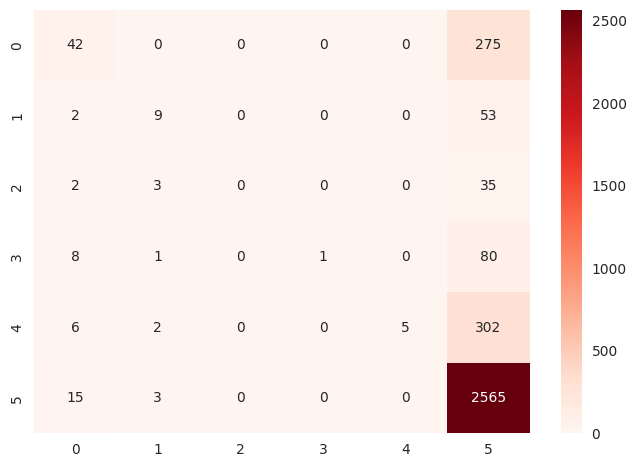

              precision    recall  f1-score   support

           0       0.56      0.13      0.21       317
           1       0.50      0.14      0.22        64
           2       0.00      0.00      0.00        40
           3       1.00      0.01      0.02        90
           4       1.00      0.02      0.03       315
           5       0.77      0.99      0.87      2583

    accuracy                           0.77      3409
   macro avg       0.64      0.22      0.23      3409
weighted avg       0.77      0.77      0.69      3409



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance')
knn.fit(x_train,y_train)

# Make predictions on the testing data
y_pred = knn.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,knn.predict(x_test)))

# Model fitting: linear SVC

In [38]:
from sklearn.svm import LinearSVC
svc=LinearSVC(max_iter=30000)
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        'penalty':['l2'],
       }
gsvc=GridSearchCV(svc,params,cv=3,verbose=3)
gsvc.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.772 total time=   7.4s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.768 total time=   9.0s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.766 total time=   8.8s
[CV 1/3] END .................C=0.2, penalty=l2;, score=0.777 total time=  11.8s
[CV 2/3] END .................C=0.2, penalty=l2;, score=0.771 total time=  13.8s
[CV 3/3] END .................C=0.2, penalty=l2;, score=0.769 total time=  11.8s
[CV 1/3] END .................C=0.3, penalty=l2;, score=0.778 total time=  15.4s
[CV 2/3] END .................C=0.3, penalty=l2;, score=0.771 total time=  16.6s
[CV 3/3] END .................C=0.3, penalty=l2;, score=0.774 total time=  14.3s
[CV 1/3] END .................C=0.4, penalty=l2;, score=0.777 total time=  18.5s
[CV 2/3] END .................C=0.4, penalty=l2;, score=0.774 total time=  20.9s
[CV 3/3] END .................C=0.4, penalty=l2;,

GridSearchCV(cv=3, estimator=LinearSVC(max_iter=30000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'penalty': ['l2']},
             verbose=3)

In [39]:
pd.DataFrame(gsvc.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'C': 0.4, 'penalty': 'l2'}",19.296225,0.775985,NaN,1
"{'C': 0.5, 'penalty': 'l2'}",21.003803,0.775203,NaN,2
"{'C': 0.3, 'penalty': 'l2'}",15.465133,0.774421,NaN,3
"{'C': 0.6, 'penalty': 'l2'}",21.973151,0.773834,NaN,4
"{'C': 0.2, 'penalty': 'l2'}",12.431811,0.772563,NaN,5


In [40]:
svc=gsvc.best_params_
svc

{'C': 0.4, 'penalty': 'l2'}

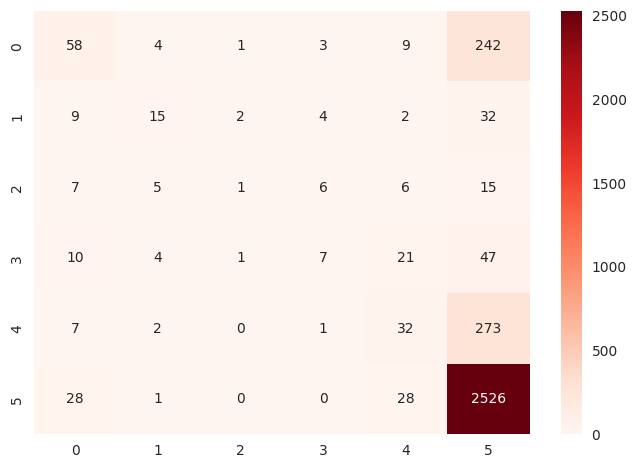

              precision    recall  f1-score   support

           0       0.49      0.18      0.27       317
           1       0.48      0.23      0.32        64
           2       0.20      0.03      0.04        40
           3       0.33      0.08      0.13        90
           4       0.33      0.10      0.15       315
           5       0.81      0.98      0.88      2583

    accuracy                           0.77      3409
   macro avg       0.44      0.27      0.30      3409
weighted avg       0.71      0.77      0.72      3409



In [41]:
#giving score 0.7738 
from sklearn.svm import LinearSVC


svc = LinearSVC(C=0.4,penalty='l2', max_iter=100000)
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,pred))

In [42]:
svc.score(x_train,y_train),svc.score(x_test,y_test)

(0.8855969492519801, 0.7741273100616016)

# Model fitting XGBOOST

In [43]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
params={'max_depth':[40,50,60]}
g_xgb=GridSearchCV(xgb,params,cv=3,verbose=3,return_train_score=True)
g_xgb.fit(x_train,y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ..max_depth=40;, score=(train=1.000, test=0.776) total time= 1.5min
[CV 2/3] END ..max_depth=40;, score=(train=1.000, test=0.765) total time= 1.5min
[CV 3/3] END ..max_depth=40;, score=(train=1.000, test=0.778) total time= 1.5min
[CV 1/3] END ..max_depth=50;, score=(train=1.000, test=0.778) total time= 1.6min
[CV 2/3] END ..max_depth=50;, score=(train=1.000, test=0.765) total time= 1.6min
[CV 3/3] END ..max_depth=50;, score=(train=1.000, test=0.776) total time= 1.6min
[CV 1/3] END ..max_depth=60;, score=(train=1.000, test=0.778) total time= 1.6min
[CV 2/3] END ..max_depth=60;, score=(train=1.000, test=0.766) total time= 1.6min
[CV 3/3] END ..max_depth=60;, score=(train=1.000, test=0.774) total time= 1.6min


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [40, 50, 60]}, return_train_score=True,
             verbose=3)

In [44]:
pd.DataFrame(g_xgb.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
{'max_depth': 50},95.797502,0.773052,0.999756,1
{'max_depth': 40},91.699819,0.773052,0.999756,2
{'max_depth': 60},96.940742,0.772465,0.999756,3


In [45]:
g_xgb.best_params_

{'max_depth': 50}

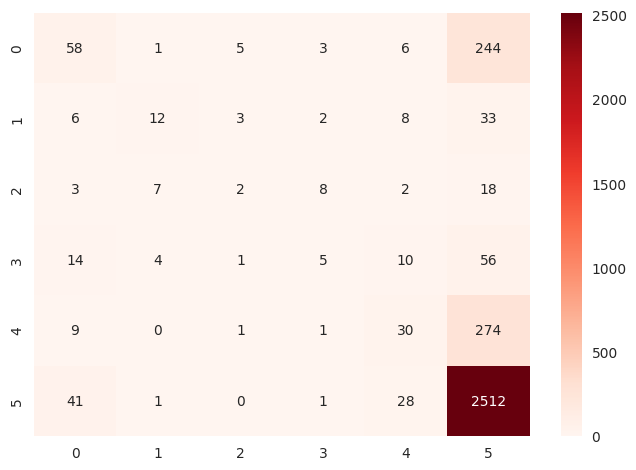

              precision    recall  f1-score   support

           0       0.44      0.18      0.26       317
           1       0.48      0.19      0.27        64
           2       0.17      0.05      0.08        40
           3       0.25      0.06      0.09        90
           4       0.36      0.10      0.15       315
           5       0.80      0.97      0.88      2583

    accuracy                           0.77      3409
   macro avg       0.42      0.26      0.29      3409
weighted avg       0.70      0.77      0.71      3409



In [46]:
#giving score 0.7717
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=50, n_jobs = -1)
xgb.fit(x_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pred=xgb.predict(x_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,pred))

In [47]:
accuracy_score(y_test,pred)

0.7682604869463185

In [48]:
'''%%time
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, verbose=3)
model.fit(X_train, y_train)
model = model.best_estimator_'''

"%%time\nfrom sklearn.model_selection import RandomizedSearchCV as RSCV\nfrom sklearn.ensemble import RandomForestClassifier\nparam_grid = {'n_estimators':np.arange(50,200,15),\n              'max_features':np.arange(0.1, 1, 0.1),\n              'max_depth': [3, 5, 7, 9],\n              'max_samples': [0.3, 0.5, 0.8]}\n\nmodel = RSCV(RandomForestClassifier(), param_grid, verbose=3)\nmodel.fit(X_train, y_train)\nmodel = model.best_estimator_"

# Fiting model RandomForest by reducing the dimesion of X by using PCA

In [49]:
'''from sklearn.preprocessing import normalize

tfidf_matrix =(normalize(tf_Review.toarray()))
tfidf_test_matrix =(normalize(tf_test_Review.toarray()))

RName =(normalize(tf_RName.toarray()))
test_RName =(normalize(tf_test_RName.toarray()))

UName= (normalize(tf_UName.toarray()))
test_UName=(normalize(tf_test_UName.toarray()))

print(tfidf_matrix.shape,RName.shape)'''

'from sklearn.preprocessing import normalize\n\ntfidf_matrix =(normalize(tf_Review.toarray()))\ntfidf_test_matrix =(normalize(tf_test_Review.toarray()))\n\nRName =(normalize(tf_RName.toarray()))\ntest_RName =(normalize(tf_test_RName.toarray()))\n\nUName= (normalize(tf_UName.toarray()))\ntest_UName=(normalize(tf_test_UName.toarray()))\n\nprint(tfidf_matrix.shape,RName.shape)'

In [50]:
#feature reduction using PCA
'''
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
#on Recipe_Review
pca_Review=pca.fit_transform(tfidf_matrix)
test_pca_Review=pca.transform(tfidf_test_matrix)

#on Recipename and username
pca1=PCA(n_components=10)
pca_RName=pca1.fit_transform(RName)
test_pca_RName=pca1.transform(test_RName)

pca_UName=pca1.fit_transform(UName)
test_pca_UName=pca1.transform(test_UName)

X_pca=np.hstack([train_X,pca_Review,pca_RName,pca_UName])
X_test_pca=np.hstack([test_X,test_pca_Review,test_pca_RName,test_pca_UName])


#once again train_test_split
x_pca_train,x_pca_test,y_pca_train,y_pca_test=train_test_split(X_pca,y,random_state=20,test_size=0.2)

#fitting to RandomForest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.5, 1, 0.1),
              'max_depth': [30,35,40,45],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, verbose=3)
model.fit(x_pca_train,y_pca_train)

model = model.best_estimator_'''

"\nfrom sklearn.decomposition import PCA\npca=PCA(n_components=50)\n#on Recipe_Review\npca_Review=pca.fit_transform(tfidf_matrix)\ntest_pca_Review=pca.transform(tfidf_test_matrix)\n\n#on Recipename and username\npca1=PCA(n_components=10)\npca_RName=pca1.fit_transform(RName)\ntest_pca_RName=pca1.transform(test_RName)\n\npca_UName=pca1.fit_transform(UName)\ntest_pca_UName=pca1.transform(test_UName)\n\nX_pca=np.hstack([train_X,pca_Review,pca_RName,pca_UName])\nX_test_pca=np.hstack([test_X,test_pca_Review,test_pca_RName,test_pca_UName])\n\n\n#once again train_test_split\nx_pca_train,x_pca_test,y_pca_train,y_pca_test=train_test_split(X_pca,y,random_state=20,test_size=0.2)\n\n#fitting to RandomForest\nfrom sklearn.ensemble import RandomForestClassifier\n\nfrom sklearn.model_selection import RandomizedSearchCV as RSCV\nfrom sklearn.ensemble import RandomForestClassifier\nparam_grid = {'n_estimators':np.arange(50,200,15),\n              'max_features':np.arange(0.5, 1, 0.1),\n              'ma

In [51]:
'''model'''

'model'

In [52]:
'''rf=RandomForestClassifier(max_depth=30, max_features=0.7, max_samples=0.8,n_estimators=155)
rf.fit(x_pca_train,y_pca_train)
rf.score(x_pca_test,y_pca_test)'''

'rf=RandomForestClassifier(max_depth=30, max_features=0.7, max_samples=0.8,n_estimators=155)\nrf.fit(x_pca_train,y_pca_train)\nrf.score(x_pca_test,y_pca_test)'

In [53]:
'''#print(model.score(x_pca_test,y_pca_test),model.score(x_pca_train,y_pca_train))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_pca_test, rf.predict(x_pca_test))
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_pca_test,rf.predict(x_pca_test)))'''

"#print(model.score(x_pca_test,y_pca_test),model.score(x_pca_train,y_pca_train))\n\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay\nimport seaborn as sns\nimport matplotlib.pyplot as plt\ncf_matrix = confusion_matrix(y_pca_test, rf.predict(x_pca_test))\nsns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')\nplt.show()\nprint(classification_report(y_pca_test,rf.predict(x_pca_test)))"

In [54]:
'''from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

bn=MultinomialNB()
params={'alpha':[1,0.5,1.5,2]}
gr=GridSearchCV(bn,params,cv=3,verbose=3)
gr.fit(x_train,y_train)
bn=gr
bn.fit(x_train,y_train)
bn.score(x_test,y_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred=bn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,y_pred))'''

"from sklearn.naive_bayes import MultinomialNB\nfrom sklearn.model_selection import GridSearchCV\n\nbn=MultinomialNB()\nparams={'alpha':[1,0.5,1.5,2]}\ngr=GridSearchCV(bn,params,cv=3,verbose=3)\ngr.fit(x_train,y_train)\nbn=gr\nbn.fit(x_train,y_train)\nbn.score(x_test,y_test)\n\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay\ny_pred=bn.predict(x_test)\ncf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')\nplt.show()\nprint(classification_report(y_test,y_pred))"

# Finally doing with stacking classifier using models LinearSVC and KNeighboursClassifier and meta-estimator LogisticRegressor

In [55]:
#time=978sec
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the base estimators
svc = LinearSVC(C=0.4, penalty='l2', max_iter=10000)
xgb = XGBClassifier(max_depth=50)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('svc', svc), ('xgb',xgb)],
    final_estimator=LogisticRegression(max_iter=10000)
)

# Fit the stacking classifier on the training data
stacking_clf.fit(x_train, y_train)

# Evaluate the stacking classifier
print("Training Accuracy:", stacking_clf.score(x_train, y_train))
print("Test Accuracy:", stacking_clf.score(x_test, y_test))

#train-accuracy=0.9787
#test-accuracy 0.7829

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy: 0.9786838760144715
Test Accuracy: 0.7829275447345263


# before predicting, once again fit your model on whole datatset available for training

In [56]:
df1=pipeline.fit_transform(df1)
df2=pipeline.transform(df2)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [57]:
stacking_clf = StackingClassifier(
    estimators=[('svc', svc), ('xgb',xgb)],
    final_estimator=LogisticRegression(solver='liblinear',max_iter=1000000)
)


In [58]:
#as SVC is giving good results than every other , I'm fiting it on whole training data

stacking_clf.fit(df1,y)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


StackingClassifier(estimators=[('svc', LinearSVC(C=0.4, max_iter=10000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=Non...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=50,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(max_iter=1000000,
                                                      solver='liblinear'))

In [59]:
y_pred=stacking_clf.predict(df2)

In [60]:
y_pred

array([5, 5, 0, ..., 5, 1, 5])

In [61]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [i + 1 for i in range(len(y_pred))] # index starts from 1
submission['Rating'] =y_pred
submission['Rating']

0       5
1       5
2       0
3       1
4       5
       ..
4541    5
4542    5
4543    5
4544    1
4545    5
Name: Rating, Length: 4546, dtype: int64

In [62]:
#Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)